## News Popularity Prediction
- Exploratory Data Analysis
- 5 Different Hypothesis Test (implement 3)
- Fit Ridge And Lasso Regression
- Use Scaling Methods
- Add Polynomial Features
- Apply Sequential Feature Selection Methods

# EDA :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Sequentialfeatureselection import backward_fs, forward_fs
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [113]:
print(df.shape)

(39644, 61)


In [26]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [27]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [28]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

check if we have any missing value

In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Null hypothesises :
- 1_ shares of news on weekends in socmed data channel is higher than shares on other channels.
- 2_news with higher num_imgs and higher num_videos would have more shares.
- 3_ newdays with a higher global_sentiment_polarity will have a higher shares.
- 4_ nowdays we have decread rate of negative words meaning if time_delta increases rate_negative_words decreses.
- 5_as title_subjectivity increases title_sentiment_polarity would increase as well.

in next sections we will examine first 3 hypothesises

In [39]:
print('entertainment_weekend =', df.loc[(df[' data_channel_is_entertainment'] == 1) & (df[' is_weekend'] == 1), ' shares'].mean())
print('tech_weekend =', df.loc[(df[' data_channel_is_tech'] == 1) & (df[' is_weekend'] == 1), ' shares'].mean())
print('socmed_weekend =', df.loc[(df[' data_channel_is_socmed'] == 1) & (df[' is_weekend'] == 1), ' shares'].mean())
print("world_weekend =", df.loc[(df[' data_channel_is_world'] == 1) & (df[' is_weekend'] == 1), ' shares'].mean())
print('bus_weekend =', df.loc[(df[' data_channel_is_bus'] == 1) & (df[' is_weekend'] == 1), ' shares'].mean())

entertainment_weekend = 3647.272925764192
tech_weekend = 3753.14332247557
socmed_weekend = 3948.0788643533124
world_weekend = 2679.4235727440146
bus_weekend = 3909.9897610921503


#### First Hypothesis :
it lookes like the hypothesis was correct and the socmed_weekend mean is the highest.

### Data visualizing and other hypothesises:

In this section I grouped features that are more relevant to each other so the visualization becomes easier

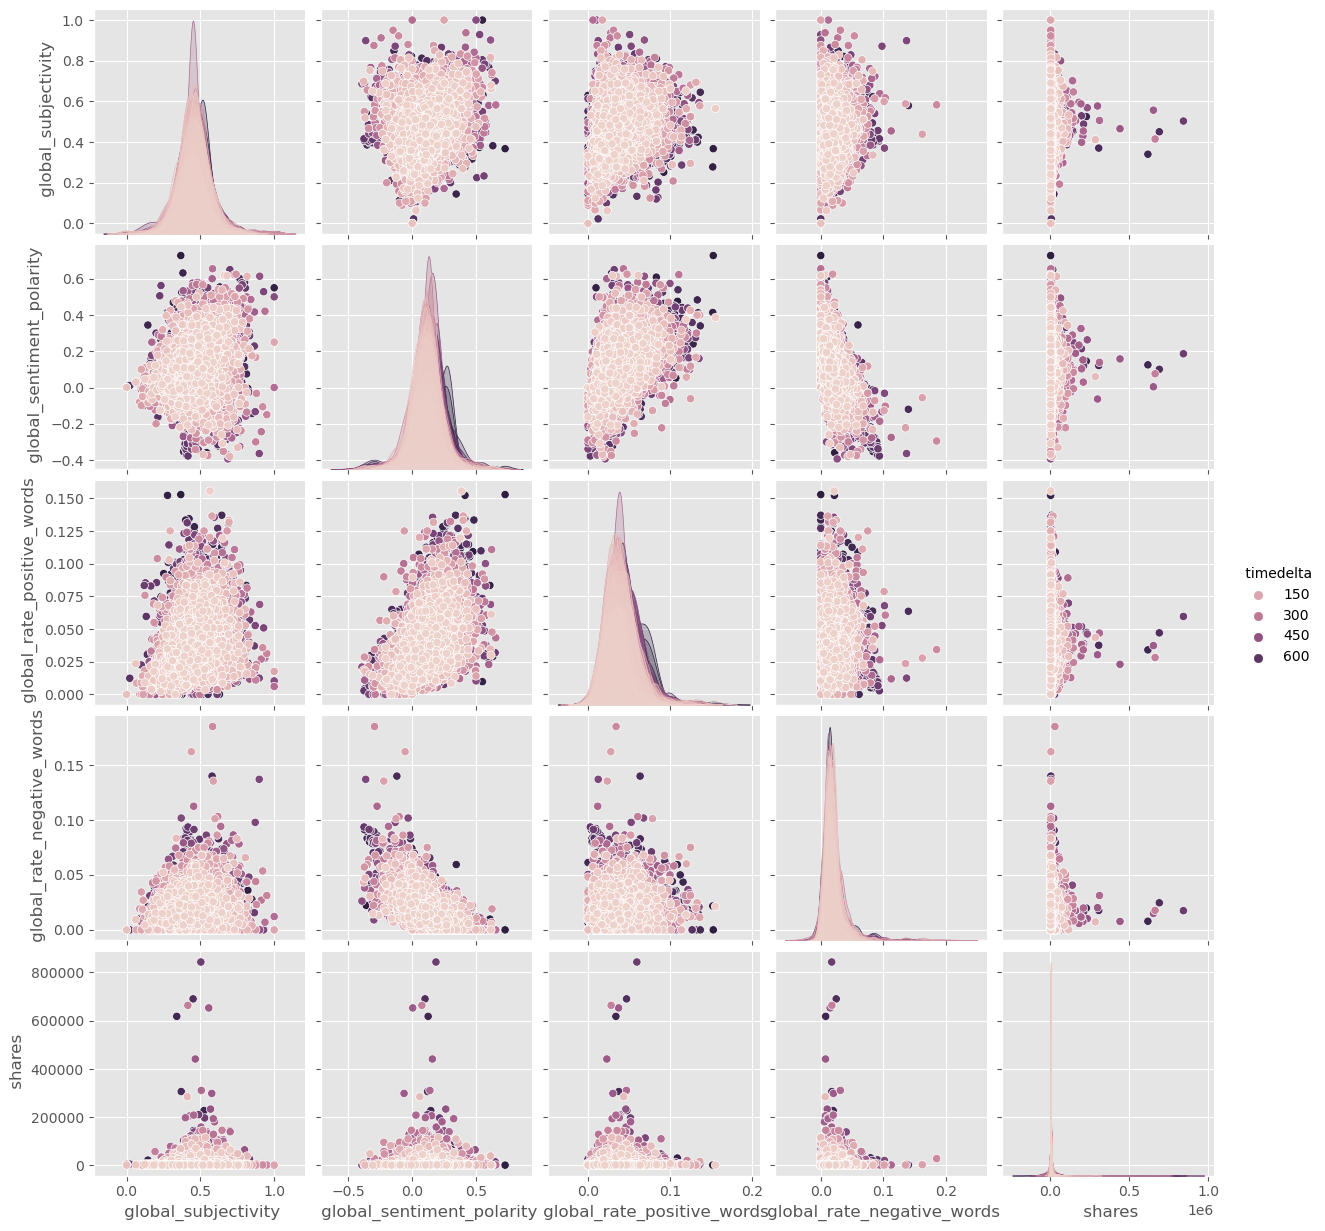

In [10]:
sns.pairplot(df,
             vars=[' global_subjectivity',' global_sentiment_polarity',
                   ' global_rate_positive_words',' global_rate_negative_words', ' shares'],
            hue=' timedelta')
plt.show()

#### in this plot we can also answer our third hypothesis :
as you can observe in the plot of shares/global_sentiment_polarity. it looks like people would prefer more netural news rather highly sentimental news. so our hypothesis is rejected.

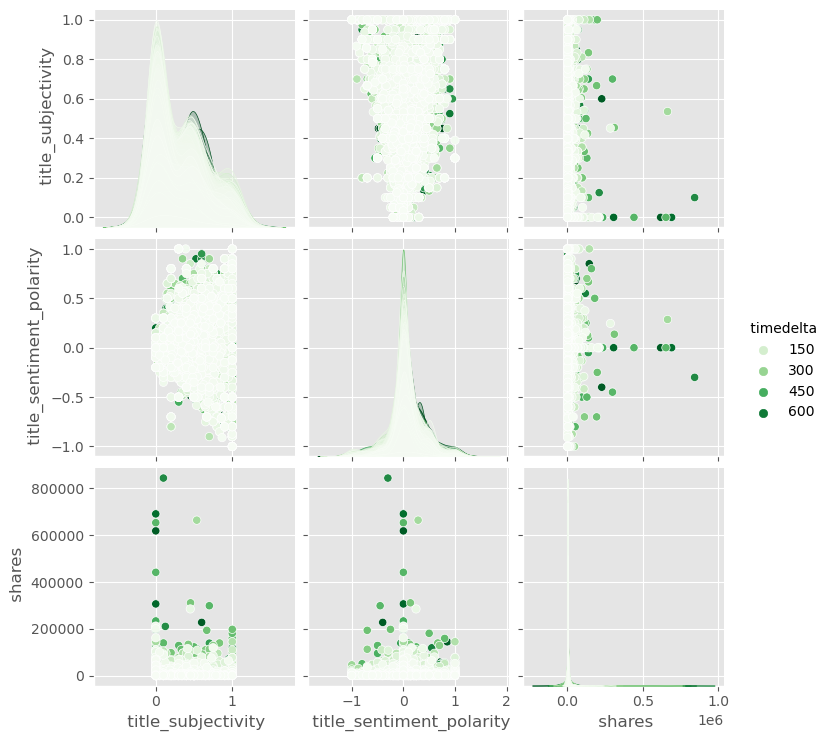

In [38]:
sns.pairplot(df,
             vars=[' title_subjectivity',' title_sentiment_polarity', ' shares'],
            hue=' timedelta', palette='Greens')
plt.show()

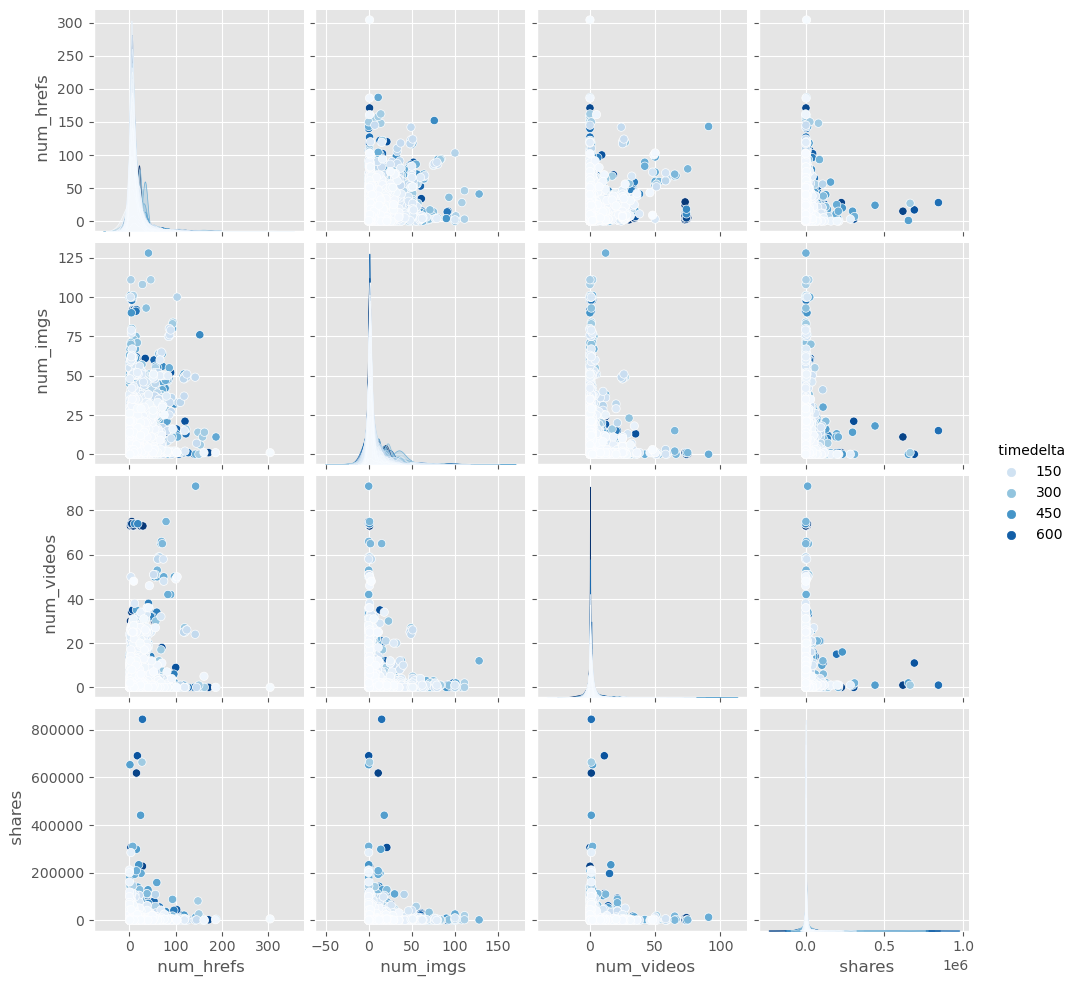

In [39]:
sns.pairplot(df,
             vars=[' num_hrefs',' num_imgs', ' num_videos', ' shares'],
            hue=' timedelta', palette='Blues')
plt.show()

#### in this plot we can also answer our second hypothesis:
as you can see it lookes like our hypothesis is false duo to the plot of shares/num_img and shares_num_videos we can see higher number of images or videos would result in less popularity. of course there is seen some noise in this plot because a part of datas with more shares are the older one and because the rate of news published increased over time it is a logical result that each news backdays would have on average more popularity.

In [3]:
df_corr = df[[' num_imgs', ' num_videos', ' shares']].copy()
df_corr.corr()

,num_imgs,num_videos,shares
num_imgs,1.000000,-0.067336,0.039388
num_videos,-0.067336,1.000000,0.023936
shares,0.039388,0.023936,1.000000


### Data Cleaning

check if we have any missing value

In [4]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

we saw min of n_token_content is 0 so we have empty news in our data and it's better to remove them

In [5]:
df  = df[df[' n_tokens_content'] != 0]
print(df.shape)

(38463, 61)


In [6]:
df = df.drop(columns=['url', ' timedelta', ' min_negative_polarity', ' max_negative_polarity', ' min_positive_polarity', ' max_positive_polarity', ' weekday_is_saturday', ' weekday_is_sunday'])

from the description we saw range of target is alot larger than features so we implemented log function on shares

In [7]:
df[' shares'] = np.log(df[' shares'])
df.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.013699,0.769231,0.230769,0.378636,-0.350000,0.500000,-0.187500,0.000000,0.187500,6.385194
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.015686,0.733333,0.266667,0.286915,-0.118750,0.000000,0.000000,0.500000,0.000000,6.566672
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.009479,0.857143,0.142857,0.495833,-0.466667,0.000000,0.000000,0.500000,0.000000,7.313220
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.020716,0.666667,0.333333,0.385965,-0.369697,0.000000,0.000000,0.500000,0.000000,7.090077
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.012127,0.860215,0.139785,0.411127,-0.220192,0.454545,0.136364,0.045455,0.136364,6.224558


### Modeling

In [8]:
y = df[' shares'].values
X = df.drop(columns = [' shares']).values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print('X_train shape:', X_train.shape, '- y_train shape: ', y_train.shape)

X_train shape: (30770, 52) - y_train shape:  (30770,)


In [11]:
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train) 
y_pred_rr = rr.predict(X_test)
print('ridge mse :', mean_squared_error(y_test, y_pred_rr))
print('ridge r2_score', r2_score(y_test, y_pred_rr))

lar = Lasso(alpha=0.001)
lar.fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)
print('lasso mse :', np.sqrt(mean_squared_error(y_test, y_pred_lar))) 
print('lasso r2_score', r2_score(y_test, y_pred_lar))

ridge mse : 0.7231056361420773
ridge r2_score 0.13187661259561767
lasso mse : 0.8502085892462575
lasso r2_score 0.13217793936109878


used best alpha for each

### Scaling methods :

#### Standard Normalization:

In [13]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df_scale.head(5)
y_scale = df_scale[' shares'].values
X_scale = df_scale.drop(columns = [' shares']).values
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.20, random_state=40)

#ridge
rr.fit(X_train_scale, y_train_scale) 
y_pred_rr_scale = rr.predict(X_test_scale)
print('ridge mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('ridge r2_score:', r2_score(y_test_scale, y_pred_rr_scale))

#lasso
lar.fit(X_train_scale, y_train_scale) 
y_pred_lar_scale = lar.predict(X_test_scale)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_lar_scale))
print('lasso r2_score:', r2_score(y_test_scale, y_pred_lar_scale))

ridge mse: 0.8443322836625392
ridge r2_score: 0.13180198315152347
lasso mse: 0.8442932508050914
lasso r2_score: 0.13184211930417788


#### Min-Max Scaler :

In [14]:
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df_scale.head(5)
y_scale = df_scale[' shares'].values
X_scale = df_scale.drop(columns = [' shares']).values
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.20, random_state=40)

#ridge regression
rr.fit(X_train_scale, y_train_scale) 
y_pred_rr_scale = rr.predict(X_test_scale)
print('ridge mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('ridge r2_score:', r2_score(y_test_scale, y_pred_rr_scale))

#lasso regression
lar.fit(X_train_scale, y_train_scale) 
y_pred_lar_scale = lar.predict(X_test_scale)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_lar_scale))
print('lasso r2_score:', r2_score(y_test_scale, y_pred_lar_scale))

ridge mse: 0.0039060299622507644
ridge r2_score: 0.12689328536382183
lasso mse: 0.004178024471866846
lasso r2_score: 0.06609492104376613


## Feature Selection

#### using implemented forward and backward feature selection on l2

In [124]:
#forward
X_f = forward_fs(X_scale, y_scale, "l2")
X_f.shape

22
20


(38463, 4)

In [125]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y, test_size=0.20, random_state=40)
rr.fit(X_train_f, y_train_f)
y_pred_rr_f = rr.predict(X_test_f)
print('ridge mse:', mean_squared_error(y_test_f, y_pred_rr_f))
print('ridge r2_score:', r2_score(y_test_f, y_pred_rr_f))

ridge mse: 0.8286314790182225
ridge r2_score: 0.005187720132964868


In [126]:
# backward
X_b = backward_fs(X_scale, y_scale, "l2")
X_b.shape

(38463, 52)

In [127]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.20, random_state=40)
rr.fit(X_train_b, y_train_b)
y_pred_rr_b = rr.predict(X_test_b)
print('ridge mse:', mean_squared_error(y_test_b, y_pred_rr_b))
print('ridge r2_score:', r2_score(y_test_b, y_pred_rr_b))

ridge mse: 0.7272565115364449
ridge r2_score: 0.12689328536382194


#### using implemented forward and backward feature selection on l1

In [128]:
# forward
X_f = forward_fs(X_scale, y_scale, "l1")
X_f.shape

(38463, 2)

In [129]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y, test_size=0.20, random_state=40)
lar.fit(X_train_f, y_train_f)
y_pred_lar_f = lar.predict(X_test_f)
print('lasso mse:', mean_squared_error(y_test_f, y_pred_lar_f))
print('lasso r2_score:', r2_score(y_test_f, y_pred_lar_f))

lasso mse: 0.8320489753912745
lasso r2_score: 0.0010848499857418759


In [130]:
# backward
X_b = backward_fs(X_scale, y_scale, "l1")
X_b.shape

(38463, 52)

In [131]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.20, random_state=40)
lar.fit(X_train_b, y_train_b)
y_pred_lar_b = lar.predict(X_test_b)
print('ridge mse:', mean_squared_error(y_test_b, y_pred_lar_b))
print('ridge r2_score:', r2_score(y_test_b, y_pred_lar_b))

ridge mse: 0.740080733537792
ridge r2_score: 0.1114971848659303


#### scikit forward feature selection

In [132]:
from sklearn.feature_selection import SequentialFeatureSelector

In [133]:
sfs = SequentialFeatureSelector(lar, n_features_to_select=15)
sfs.fit(X_scale, y_scale)

SequentialFeatureSelector(estimator=Lasso(alpha=0.001), n_features_to_select=15)

In [ ]:
X_f = sfs.transform(X)

In [101]:
X_f.shape

(38463, 15)

In [103]:
X_train_scale_f, X_test_scale_f, y_train_scale_f, y_test_scale_f = train_test_split(X_f, y, test_size=0.20, random_state=40)
lar.fit(X_train_scale_f, y_train_scale_f) 
y_pred_lar_scale_f = lar.predict(X_test_scale_f)
print('lasso mse:', mean_squared_error(y_test_scale_f, y_pred_lar_scale_f))
print('lasso r2_score:', r2_score(y_test_scale_f, y_pred_lar_scale_f))

lasso mse: 0.7590366590148329
lasso r2_score: 0.08873967695282592


In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [107]:
lasso_pipeline = Pipeline([
    ('select_k_best', SelectKBest(k=15)),
    ('lasso', Lasso(alpha=0.1))
])

lasso_pipeline.fit(X_train_scale, y_train_scale)
y_pred_fs = lasso_pipeline.predict(X_test_scale)
lasso_score = lasso_pipeline.score(X_test_scale, y_test_scale)
print('r2_score:', lasso_score)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_fs))

r2_score: 0.025374486850989975
lasso mse: 0.8118168591138637


## Polynomial

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [28]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Ridge(alpha=1, max_iter=10000))
])

poly_pipeline.fit(X_train_scale, y_train_scale)
y_pred_poly = poly_pipeline.predict(X_test_scale)
poly_score = poly_pipeline.score(X_test_scale, y_test_scale)
print('poly score:', poly_score)
print('ridge mse:', mean_squared_error(y_test_scale, y_pred_poly))

poly score: 0.15107611382562824
ridge mse: 0.0037978428976453257


In [25]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Lasso(alpha=0.001, max_iter=10000))
])

poly_pipeline.fit(X_train_scale, y_train_scale)
y_pred_poly = poly_pipeline.predict(X_test_scale)
poly_score = poly_pipeline.score(X_test_scale, y_test_scale)
print('poly score:', poly_score)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_poly))

poly score: 0.07145814745441614
lasso mse: 0.004154030929378671


In [76]:
def absolute_error(y_pred, y):
    return np.sum(np.abs(y_pred - y))

In [77]:
absolute_error(y_pred_poly, y_test_scale)

5228.566619360144